<a href="https://colab.research.google.com/github/Tani-7/Omwansa-DS-portfolio/blob/main/EVs_MN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Requirements

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
pip install plotly

**Files**

In [5]:
ev_analysis = "C:\\Users\\asus\\.spyder-py3\\data_mining\\data_mining"

In [3]:
def download_file(url, filename):
    response = requests.get(url)
    response.raise_for_status()
    with open(f"{ev_analysis}\\{filename}", 'wb') as f:
        f.write(response.content)

In [6]:
url = 'https://www.atlasevhub.com/public/dmv/MN_EV_Registrations.csv'
filename = 'MN_EV_Registrations.csv'
download_file(url, filename)


file_path = f"{ev_analysis}\\{filename}"

data = pd.read_csv(file_path)


<ipython-input-6-4cae96eb9b0f>:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


**Data Cleaning**

In [7]:
columns = data.columns
print(columns)

Index(['State', 'ZIP Code', 'Registration Date', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Model Year', 'Drivetrain Type',
       'Vehicle GVWR Class', 'Vehicle Category', 'Vehicle Count',
       'DMV Snapshot ID', 'DMV Snapshot (Date)', 'Latest DMV Snapshot Flag'],
      dtype='object')


In [8]:
print(data['Registration Date'].head(15))

# Convert 'Registration Date' to datetime format
data['Registration Date'] = pd.to_datetime(data['Registration Date'])

0     10/1/2021
1     10/1/2021
2     10/1/2021
3     10/1/2021
4     10/1/2021
5     10/1/2021
6     10/1/2021
7     10/1/2021
8     10/1/2021
9     10/1/2021
10    10/1/2021
11    10/1/2021
12    10/1/2021
13    10/1/2021
14    10/1/2021
Name: Registration Date, dtype: object


In [9]:
# Extract the year and create a new column 'registration_year'
data['registration_year'] = data['Registration Date'].dt.year

print(data['registration_year'].head(15))

0     2021.0
1     2021.0
2     2021.0
3     2021.0
4     2021.0
5     2021.0
6     2021.0
7     2021.0
8     2021.0
9     2021.0
10    2021.0
11    2021.0
12    2021.0
13    2021.0
14    2021.0
Name: registration_year, dtype: float64


In [10]:
# Fill NaN values with a placeholder value (like 0)
data['registration_year'] = data['registration_year'].fillna(0)

data['registration_year'] = data['registration_year'].astype(int)

**Filter our fringe vehicle makes i.e < 100 sales volumes**

In [11]:
vehicle_make_counts = data['Vehicle Make'].value_counts()
vehicle_makes_over_100 = vehicle_make_counts[vehicle_make_counts > 100].index

In [12]:
data = data[data['Vehicle Make'].isin(vehicle_makes_over_100)]

**Filter out unnecessary columns**

In [13]:
retain = ['ZIP Code', 'Vehicle Make', 'Vehicle Model', 'registration_year', 'Vehicle Model Year']

In [14]:
data_filtered = data[retain]

In [15]:
data_filtered.head(15)

,ZIP Code,Vehicle Make,Vehicle Model,registration_year,Vehicle Model Year
0,55337,TESLA,MODEL 3,2021,2018
1,55345,TESLA,MODEL 3,2021,2018
2,55077,TESLA,MODEL 3,2021,2018
3,55344,TESLA,MODEL 3,2021,2018
4,55416,TESLA,MODEL 3,2021,2018
5,55110,TESLA,MODEL 3,2021,2018
6,55016,TESLA,MODEL 3,2021,2018
7,55426,TESLA,MODEL 3,2021,2018
8,55401,TESLA,MODEL 3,2021,2018
9,55129,TESLA,MODEL 3,2021,2018


**Save as new filtered DF**

In [16]:
data_filtered.to_csv('cleaned_MN_EV_Registrations.csv', index=False)

# **Visualizations Pt. 1**

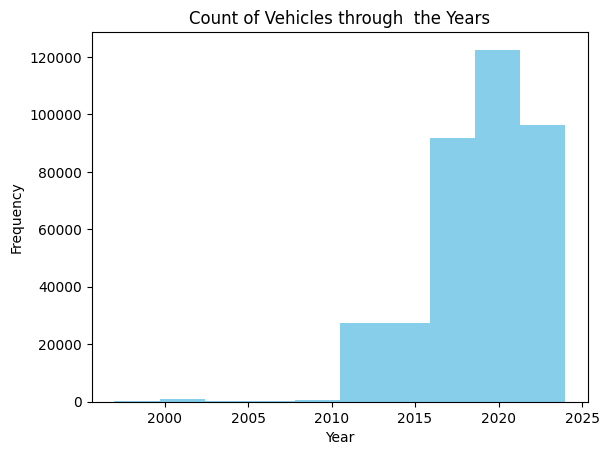

In [20]:
plt.hist(data_filtered['Vehicle Model Year'], bins=10, color='skyblue')
plt.title('Count of Vehicles through  the Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

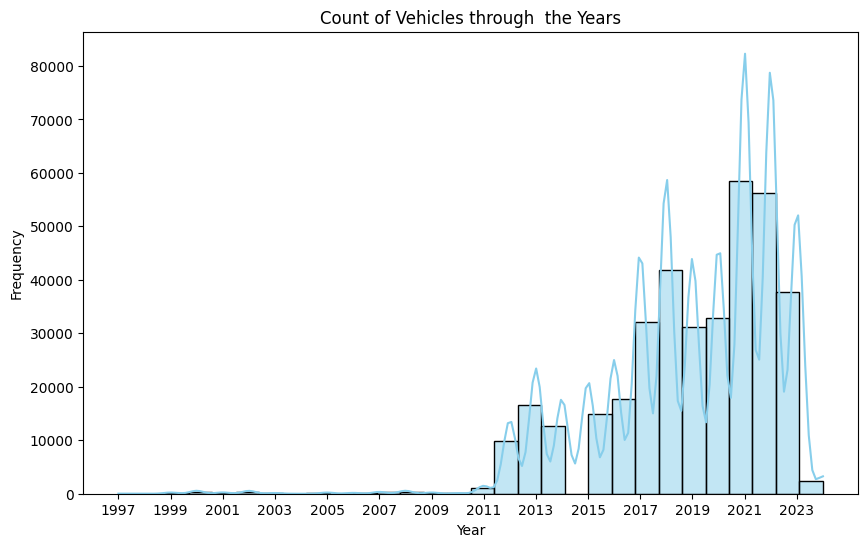

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data_filtered['Vehicle Model Year'], bins=30, color='skyblue', kde=True)
plt.title('Count of Vehicles through  the Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(range(min(data_filtered['Vehicle Model Year']), max(data_filtered['Vehicle Model Year'])+1, 2))
plt.show()

In [28]:
vehicle_make_counts_2024 = data_filtered[data_filtered['registration_year'] == 2024]['Vehicle Make'].value_counts()

vehicle_make_counts_2024_sorted = vehicle_make_counts_2024.sort_values()

# Bar chart
fig = px.bar(vehicle_make_counts_2024, x=vehicle_make_counts_2024.index, y=vehicle_make_counts_2024.values, labels={'x':'Manufacturer', 'y':'Volume Registered'})
fig.show()